In [0]:
from pyspark.sql.functions import col, to_timestamp, round, avg

# Load the dataset in CSV format
df = spark.read.csv("/Volumes/workspace/default/my_files/yellow_tripdata_2015-01.csv", header=True,inferSchema=True)
display(df.limit(10))

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
2,2015-01-15T19:05:39.000Z,2015-01-15T19:23:42.000Z,1,1.59,-73.993896484375,40.7501106262207,1,N,-73.97478485107422,40.75061798095703,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,2015-01-10T20:33:38.000Z,2015-01-10T20:53:28.000Z,1,3.3,-74.00164794921875,40.7242431640625,1,N,-73.99441528320312,40.75910949707031,1,14.5,0.5,0.5,2.0,0.0,0.3,17.8
1,2015-01-10T20:33:38.000Z,2015-01-10T20:43:41.000Z,1,1.8,-73.96334075927734,40.80278778076172,1,N,-73.95182037353516,40.82441329956055,2,9.5,0.5,0.5,0.0,0.0,0.3,10.8
1,2015-01-10T20:33:39.000Z,2015-01-10T20:35:31.000Z,1,0.5,-74.00908660888672,40.71381759643555,1,N,-74.00432586669922,40.71998596191406,2,3.5,0.5,0.5,0.0,0.0,0.3,4.8
1,2015-01-10T20:33:39.000Z,2015-01-10T20:52:58.000Z,1,3.0,-73.97117614746094,40.762428283691406,1,N,-74.00418090820312,40.742652893066406,2,15.0,0.5,0.5,0.0,0.0,0.3,16.3
1,2015-01-10T20:33:39.000Z,2015-01-10T20:53:52.000Z,1,9.0,-73.87437438964844,40.7740478515625,1,N,-73.98697662353516,40.75819396972656,1,27.0,0.5,0.5,6.7,5.33,0.3,40.33
1,2015-01-10T20:33:39.000Z,2015-01-10T20:58:31.000Z,1,2.2,-73.9832763671875,40.726009368896484,1,N,-73.99246978759766,40.7496337890625,2,14.0,0.5,0.5,0.0,0.0,0.3,15.3
1,2015-01-10T20:33:39.000Z,2015-01-10T20:42:20.000Z,3,0.8,-74.0026626586914,40.7341423034668,1,N,-73.99501037597656,40.72632598876953,1,7.0,0.5,0.5,1.66,0.0,0.3,9.96
1,2015-01-10T20:33:39.000Z,2015-01-10T21:11:35.000Z,3,18.2,-73.78304290771484,40.64435577392578,2,N,-73.98759460449219,40.75935745239258,2,52.0,0.0,0.5,0.0,5.33,0.3,58.13
1,2015-01-10T20:33:40.000Z,2015-01-10T20:40:44.000Z,2,0.9,-73.98558807373047,40.767948150634766,1,N,-73.98591613769531,40.75936508178711,1,6.5,0.5,0.5,1.55,0.0,0.3,9.35


In [0]:
# Q1: Outlier Detection

# Create temporary spark table for new york taxi dataframe (allow for querying)
df.createOrReplaceTempView("taxi")

# Write a SQL query to find trips with fare amounts over $1000.
display(spark.sql("""
SELECT * FROM taxi
WHERE fare_amount > 1000"""))

# Write another query to find trips with zero or negative fare amounts.
display(spark.sql("""
SELECT * FROM taxi
WHERE fare_amount <= 0
LIMIT 20"""))


VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
2,2015-01-02T20:06:34.000Z,2015-01-02T20:23:33.000Z,1,0.4,-74.01433563232422,40.711856842041016,1,N,-73.98519134521484,40.76046371459961,2,3005.5,0.05,0.5,0.0,0.0,0.3,3006.35
1,2015-01-22T21:12:26.000Z,2015-01-22T21:20:36.000Z,1,1.7,-73.96153259277344,40.77063751220703,1,N,-73.97850799560547,40.749515533447266,2,4008.0,0.5,0.5,0.0,0.0,0.3,4009.3


VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
1,2015-01-28T20:22:19.000Z,2015-01-28T20:23:19.000Z,2,4.8,-74.03569030761719,40.743648529052734,5,N,-74.03571319580078,40.74365997314453,3,0.0,0.0,0.0,0.0,0.0,0.3,0.3
2,2015-01-17T22:40:27.000Z,2015-01-17T22:43:04.000Z,1,0.11,-74.00235748291016,40.73982620239258,1,N,-74.00111389160156,40.74110794067383,4,-3.5,-0.5,-0.5,0.0,0.0,0.3,-4.8
2,2015-01-15T17:33:24.000Z,2015-01-15T17:33:31.000Z,2,0.0,-73.9825668334961,40.73979949951172,1,N,-73.9825668334961,40.73979949951172,3,-2.5,-1.0,-0.5,-0.7,0.0,0.3,-5.0
1,2015-01-21T10:16:35.000Z,2015-01-21T10:16:54.000Z,1,0.0,-73.9929428100586,40.76789855957031,5,N,-73.9929428100586,40.767887115478516,1,0.0,0.0,0.0,11.0,0.0,0.3,11.3
2,2015-01-06T12:43:31.000Z,2015-01-06T12:46:07.000Z,5,0.23,-73.9603271484375,40.76001739501953,2,N,-73.96344757080078,40.76166534423828,2,0.0,0.0,0.5,0.0,0.0,0.3,0.0
1,2015-01-23T23:57:43.000Z,2015-01-24T00:35:26.000Z,2,13.4,-73.97903442382812,40.7663688659668,5,N,-74.15727996826172,40.73886489868164,4,0.0,0.0,0.0,0.0,0.0,0.3,0.3
2,2015-01-16T16:00:45.000Z,2015-01-16T16:00:53.000Z,1,0.0,-73.9377212524414,40.75819396972656,1,N,-73.9377212524414,40.75819396972656,3,-2.5,-1.0,-0.5,0.0,0.0,0.3,-4.3
1,2015-01-08T22:26:34.000Z,2015-01-08T22:26:34.000Z,1,0.0,0.0,0.0,5,Y,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.3,0.3
2,2015-01-31T23:38:52.000Z,2015-01-31T23:38:54.000Z,2,0.0,0.0,0.0,2,N,0.0,0.0,2,-52.0,0.0,-0.5,0.0,0.0,0.3,-52.8
1,2015-01-22T09:32:57.000Z,2015-01-22T09:54:39.000Z,3,2.4,-73.95448303222656,40.74155807495117,5,N,-73.99308013916016,40.74636459350586,1,0.0,0.0,0.0,10.0,0.0,0.3,10.3


In [0]:
# Q2: Correlation Analysis

# Write SQL queries to calculate the correlation between:
# fare_amount and trip_distance.
display(spark.sql("""
SELECT corr(fare_amount, trip_distance) AS correlation_fare_trip FROM taxi
"""))

# total_amount and trip_distance.
display(spark.sql("""
SELECT corr(total_amount,trip_distance) AS correlation_total_trip FROM taxi
"""))

# Discuss any insights you can draw from these correlations.

# The results from the previous question indicate the correlation between fare_amount and trip_distance as well as total_amount and trip_distance have virtual no correlation as both values lie extremely close to 0. This suggests that the total trip distance does not rely on either the fare amount or the total amount paid for the entire taxi trip. It would make sense to except some form of correlation between the values compared above, though many additional factors such as zero trip distances, very short trip distances, and trips with no fare amount could end up skewing the results.


correlation_fare_trip
4.422117955836895E-4


correlation_total_trip
3.3390645630738535E-6


In [0]:
# Q3: Trip Duration Prediction

# Calculate the trip duration in minutes for each trip.
display(spark.sql("""
SELECT *,ROUND((unix_timestamp(tpep_dropoff_datetime) -unix_timestamp(tpep_pickup_datetime))/ 60.0, 2) AS trip_duration_minutes 
FROM taxi
LIMIT 20"""))

# Write a SQL query to find the average trip duration for trips with different passenger counts.
display(spark.sql("""
SELECT passenger_count, ROUND(AVG((unix_timestamp(tpep_dropoff_datetime) - unix_timestamp(tpep_pickup_datetime)) / 60.0), 2) AS avg_trip_duration_minutes FROM taxi
GROUP BY passenger_count
ORDER BY passenger_count
"""))


VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration_minutes
2,2015-01-15T19:05:39.000Z,2015-01-15T19:23:42.000Z,1,1.59,-73.993896484375,40.7501106262207,1,N,-73.97478485107422,40.75061798095703,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05,18.05
1,2015-01-10T20:33:38.000Z,2015-01-10T20:53:28.000Z,1,3.3,-74.00164794921875,40.7242431640625,1,N,-73.99441528320312,40.75910949707031,1,14.5,0.5,0.5,2.0,0.0,0.3,17.8,19.83
1,2015-01-10T20:33:38.000Z,2015-01-10T20:43:41.000Z,1,1.8,-73.96334075927734,40.80278778076172,1,N,-73.95182037353516,40.82441329956055,2,9.5,0.5,0.5,0.0,0.0,0.3,10.8,10.05
1,2015-01-10T20:33:39.000Z,2015-01-10T20:35:31.000Z,1,0.5,-74.00908660888672,40.71381759643555,1,N,-74.00432586669922,40.71998596191406,2,3.5,0.5,0.5,0.0,0.0,0.3,4.8,1.87
1,2015-01-10T20:33:39.000Z,2015-01-10T20:52:58.000Z,1,3.0,-73.97117614746094,40.762428283691406,1,N,-74.00418090820312,40.742652893066406,2,15.0,0.5,0.5,0.0,0.0,0.3,16.3,19.32
1,2015-01-10T20:33:39.000Z,2015-01-10T20:53:52.000Z,1,9.0,-73.87437438964844,40.7740478515625,1,N,-73.98697662353516,40.75819396972656,1,27.0,0.5,0.5,6.7,5.33,0.3,40.33,20.22
1,2015-01-10T20:33:39.000Z,2015-01-10T20:58:31.000Z,1,2.2,-73.9832763671875,40.726009368896484,1,N,-73.99246978759766,40.7496337890625,2,14.0,0.5,0.5,0.0,0.0,0.3,15.3,24.87
1,2015-01-10T20:33:39.000Z,2015-01-10T20:42:20.000Z,3,0.8,-74.0026626586914,40.7341423034668,1,N,-73.99501037597656,40.72632598876953,1,7.0,0.5,0.5,1.66,0.0,0.3,9.96,8.68
1,2015-01-10T20:33:39.000Z,2015-01-10T21:11:35.000Z,3,18.2,-73.78304290771484,40.64435577392578,2,N,-73.98759460449219,40.75935745239258,2,52.0,0.0,0.5,0.0,5.33,0.3,58.13,37.93
1,2015-01-10T20:33:40.000Z,2015-01-10T20:40:44.000Z,2,0.9,-73.98558807373047,40.767948150634766,1,N,-73.98591613769531,40.75936508178711,1,6.5,0.5,0.5,1.55,0.0,0.3,9.35,7.07


passenger_count,avg_trip_duration_minutes
0,12.56
1,14.25
2,13.84
3,14.03
4,13.84
5,14.52
6,14.05
7,8.84
8,5.34
9,15.79


In [0]:
# Q4: Trip Clustering

# Categorize trips into distance bins and calculate average fare per bin.
result = spark.sql("""
SELECT
    CASE
        WHEN trip_distance < 1 THEN '<1 mile'
        WHEN trip_distance >= 1 AND trip_distance < 2 THEN '1-2 miles'
        WHEN trip_distance >= 2 AND trip_distance < 5 THEN '2-5 miles'
        ELSE '>5 miles'
    END AS distance_bin,
    ROUND(AVG(fare_amount), 2) AS avg_fare_amount
FROM taxi
GROUP BY
    CASE
        WHEN trip_distance < 1 THEN '<1 mile'
        WHEN trip_distance >= 1 AND trip_distance < 2 THEN '1-2 miles'
        WHEN trip_distance >= 2 AND trip_distance < 5 THEN '2-5 miles'
        ELSE '>5 miles'
    END
ORDER BY avg_fare_amount DESC
""")

display(result)


distance_bin,avg_fare_amount
>5 miles,31.26
2-5 miles,13.09
1-2 miles,8.04
<1 mile,5.67


distance_bin,avg_fare_amount
>5 miles,31.26
2-5 miles,13.09
1-2 miles,8.04
<1 mile,5.67


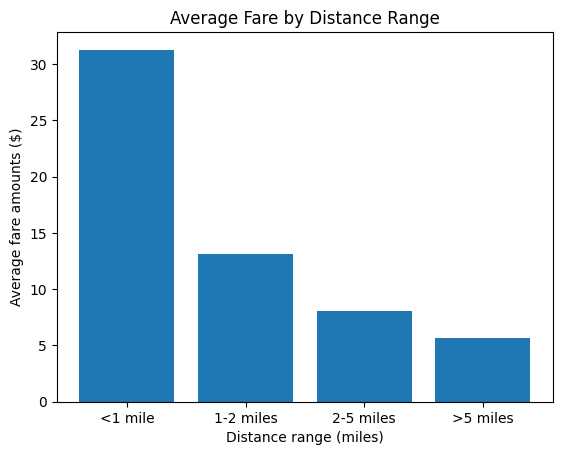

In [0]:
import matplotlib.pyplot as plt

# Q5: Fare Amount vs. Distance Analysis

# Create bins for trip distances and calculate the average fare amount for each bin.
result = spark.sql("""
SELECT
    CASE
        WHEN trip_distance < 1 THEN '<1 mile'
        WHEN trip_distance >= 1 AND trip_distance < 2 THEN '1-2 miles'
        WHEN trip_distance >= 2 AND trip_distance < 5 THEN '2-5 miles'
        ELSE '>5 miles'
    END AS distance_bin,
    ROUND(AVG(fare_amount), 2) AS avg_fare_amount
FROM taxi
GROUP BY
    CASE
        WHEN trip_distance < 1 THEN '<1 mile'
        WHEN trip_distance >= 1 AND trip_distance < 2 THEN '1-2 miles'
        WHEN trip_distance >= 2 AND trip_distance < 5 THEN '2-5 miles'
        ELSE '>5 miles'
    END
ORDER BY avg_fare_amount DESC
""")
display(result)
#A bar chart visualization of the average fare amounts by distance range.
pdf = result.toPandas()


plt.bar(pdf['distance_bin'], pdf['avg_fare_amount'])
plt.xlabel('Distance range (miles)')
plt.ylabel('Average fare amounts ($)')
plt.title('Average Fare by Distance Range')
plt.xticks(range(0, 4), ['<1 mile', '1-2 miles', '2-5 miles', '>5 miles'])
plt.show()
